In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')

df = pd.read_excel('datasets/Canada.xlsx',
                  sheet_name = 'Canada by Citizenship',
                  skiprows = range(20),
                  skipfooter = 2,
                  engine = 'openpyxl')
df.head(2)

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2012,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50
0,Immigrants,Foreigners,Afghanistan,935.0,Asia,5501.0,Southern Asia,902.0,Developing regions,16.0,...,2635.0,2004.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Immigrants,Foreigners,Albania,908.0,Europe,925.0,Southern Europe,901.0,Developed regions,1.0,...,620.0,603.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
df.shape

(1013, 51)

In [3]:
years = list(map(str, range(1980,2014)))
#years

In [4]:
df.columns = list(map(str,df.columns))

In [5]:
df_t = pd.DataFrame(df[years].sum(axis=0))
df_t.head(2)

,0
1980,286274.0
1981,257282.0


In [6]:
df_t.index = map(float, df_t.index)
df_t.reset_index(inplace=True)
df_t.head(2)

,index,0
0,1980.0,286274.0
1,1981.0,257282.0


In [7]:
df_t.columns = ['year','total',]
df_t.tail(2)

,year,total
32,2012.0,515806.0
33,2013.0,518042.0


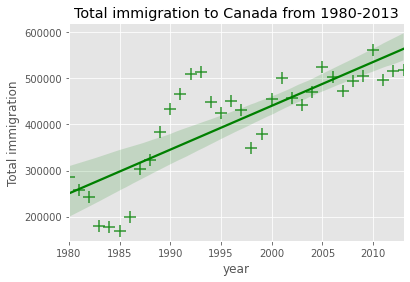

In [8]:
reg_plot = sns.regplot(x = 'year',
                      y = 'total',
                      data = df_t,
                      color = 'g',
                       marker = '+',
                      scatter_kws ={'s':150})
reg_plot.set(xlabel = 'year',
             ylabel = 'Total immigration')
reg_plot.set_title('Total immigration to Canada from 1980-2013')

plt.show()

In [9]:
df = pd.read_csv('datasets/headbrain.csv')
df.head(2)

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297


In [10]:
a = df['Head Size(cm^3)']
b = df['Brain Weight(grams)']

In [11]:
np.corrcoef(a,b)

array([[1.        , 0.79956971],
       [0.79956971, 1.        ]])

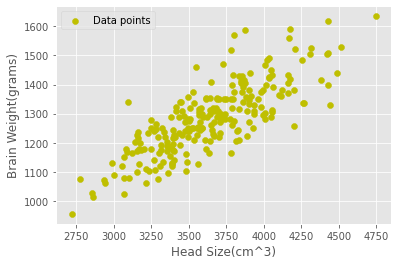

In [12]:
plt.scatter(a,b,
           c='y',
           label = 'Data points',)
plt.xlabel('Head Size(cm^3)')
plt.ylabel('Brain Weight(grams)')
plt.legend()
plt.show()
    

In [13]:
import statsmodels.api as sm
model = sm.OLS.from_formula('a~b',
                           data=df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      a   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     416.5
Date:                Fri, 03 Sep 2021   Prob (F-statistic):           5.96e-54
Time:                        13:20:46   Log-Likelihood:                -1613.4
No. Observations:                 237   AIC:                             3231.
Df Residuals:                     235   BIC:                             3238.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    520.6101    153.215      3.398      0.001     218.759     822.461
b              2.4269      0.119     20.409      0.000       2.193       2.661
==============================================================================
Omnibus:                        2.687   Durbin-Watson:                   1.726
Prob(Omnibus):                  0.261   Jarque-Bera (JB):                2.321
Skew:                           0.207   Prob(JB):                        0.313
Kurtosis:                       3.252   Cond. No.                     1.38e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.38e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
from sklearn import linear_model

lm = linear_model.LinearRegression()
X = pd.DataFrame (df['Head Size(cm^3)'])
Y = pd.DataFrame (df['Brain Weight(grams)'])

model_lm = lm.fit(X,Y)
model_lm

LinearRegression()

In [15]:
model_lm.intercept_

array([325.57342105])

In [16]:
model_lm.coef_

array([[0.26342934]])

In [17]:
model_lm.score(X,Y)

0.639311719957

In [18]:
brain_weight = pd.DataFrame([200])
predict_headsize = model_lm.predict(brain_weight)
predict_headsize

array([[378.25928895]])

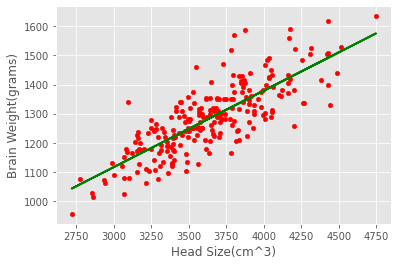

In [22]:
df.plot(kind = 'scatter',
       x = 'Head Size(cm^3)',
       y = 'Brain Weight(grams)',
       color = 'r')
plt.plot(X,
        model_lm.predict(X),
        linewidth = 2,
        color = 'g')
plt.show()

In [ ]:
df = pd.r